#### Pandas的stack和pivot实现数据透视

##### 将列式数据变成二维交叉形式，便于分析，叫做重塑或者透视
1. 经过统计得到多维度指标数据
2. 使用unstack实现数据二维透视
3. 使用pivot简化透视
4. stack、unstack、pivot的语法

#### 1.经过统计得到多维度指标数据
非常场景的统计场景，指定多个维度，计算聚合后的指标  
实列：统计得到‘电影评分数据集’，每个月份的每个分数被评分多少次：（月份，分数1~5，次数）

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
df=pd.read_csv('./files/ml-latest-small/ratings.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
# .to_datetime可以将其他type的数据转化成datetime type
df['pdate']=pd.to_datetime(df['timestamp'],unit='s')
df.head()

,userId,movieId,rating,timestamp,pdate
0,1,1,4.0,964982703,2000-07-30 18:45:03
1,1,3,4.0,964981247,2000-07-30 18:20:47
2,1,6,4.0,964982224,2000-07-30 18:37:04
3,1,47,5.0,964983815,2000-07-30 19:03:35
4,1,50,5.0,964982931,2000-07-30 18:48:51


In [5]:
df.dtypes

userId                int64
movieId               int64
rating              float64
timestamp             int64
pdate        datetime64[ns]
dtype: object

In [7]:
# 实现数据的统计
df_group=df.groupby([df['pdate'].dt.month, 'rating'])['userId'].agg(pv=np.sum)
df_group.head(20)

pv
pdate rating        
1     0.5      45106
      1.0      84054
      1.5      36978
      2.0     181774
      2.5     114794
      3.0     580822
      3.5     432974
      4.0     825315
      4.5     236725
      5.0     311858
2     0.5      63748
      1.0      81132
      1.5     115553
      2.0     246067
      2.5     240928
      3.0     432050
      3.5     441725
      4.0     603443
      4.5     231043
      5.0     224719

对这样格式的数据，我想查看按月份，不同评分的次数趋势，是没法实现的
需要将数据变换成每个评分是一列才可以实现

#### 2. 使用unstack实现数据二维透视
目的：想要画图对比按照月份的不同评分的数量趋势

In [8]:
df_stack=df_group.unstack()
df_stack

pv                                                                  \
rating    0.5     1.0     1.5     2.0     2.5     3.0     3.5     4.0     4.5   
pdate                                                                           
1       45106   84054   36978  181774  114794  580822  432974  825315  236725   
2       63748   81132  115553  246067  240928  432050  441725  603443  231043   
3       65877  127254   78754  254947  189270  515313  384724  764896  241519   
4       31441   45230   36546  178163  117785  463861  325113  668856  272687   
5       93757  103003   97450  257897  270285  843592  572013  960825  325487   
6       28452   63545  107131  279448  422507  794088  421082  685841  230985   
7       11918   63799   29295  134835  123159  462269  327703  665219  180968   
8       27957  111849   56705  263665  134243  604629  262305  684650  177946   
9       19588   42181   38042  153574  115818  418245  371552  742834  260640   
10      11643   72615   18179  168516   61308  420228  240829  542272  148711   
11      42633   72473   41736  164579  153056  590773  410212  898938  264521   
12      16195   59888   18118  172556   75304  422458  238602  548495  123454   

                
rating     5.0  
pdate           
1       311858  
2       224719  
3       361481  
4       367348  
5       410345  
6       391211  
7       283969  
8       390560  
9       293377  
10      272467  
11      467861  
12      312468

<AxesSubplot:xlabel='pdate'>

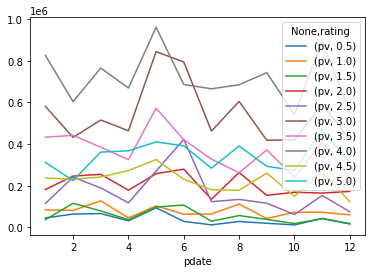

In [9]:
df_stack.plot()

In [10]:
# unstack和stack是互逆的操作
df_stack.stack().head(20)

pv
pdate rating        
1     0.5      45106
      1.0      84054
      1.5      36978
      2.0     181774
      2.5     114794
      3.0     580822
      3.5     432974
      4.0     825315
      4.5     236725
      5.0     311858
2     0.5      63748
      1.0      81132
      1.5     115553
      2.0     246067
      2.5     240928
      3.0     432050
      3.5     441725
      4.0     603443
      4.5     231043
      5.0     224719

In [ ]:
3. 使用pivot简化透视

In [11]:
df_group.head(20)

pv
pdate rating        
1     0.5      45106
      1.0      84054
      1.5      36978
      2.0     181774
      2.5     114794
      3.0     580822
      3.5     432974
      4.0     825315
      4.5     236725
      5.0     311858
2     0.5      63748
      1.0      81132
      1.5     115553
      2.0     246067
      2.5     240928
      3.0     432050
      3.5     441725
      4.0     603443
      4.5     231043
      5.0     224719

In [12]:
df_reset=df_group.reset_index()
df_reset.head()

,pdate,rating,pv
0,1,0.5,45106
1,1,1.0,84054
2,1,1.5,36978
3,1,2.0,181774
4,1,2.5,114794


In [13]:
# .pivot(x_axis,y_axix,value)
df_pivot=df_reset.pivot('pdate','rating','pv')

In [14]:
df_pivot.head()

rating,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
pdate,,,,,,,,,,
1,45106,84054,36978,181774,114794,580822,432974,825315,236725,311858
2,63748,81132,115553,246067,240928,432050,441725,603443,231043,224719
3,65877,127254,78754,254947,189270,515313,384724,764896,241519,361481
4,31441,45230,36546,178163,117785,463861,325113,668856,272687,367348
5,93757,103003,97450,257897,270285,843592,572013,960825,325487,410345


<AxesSubplot:xlabel='pdate'>

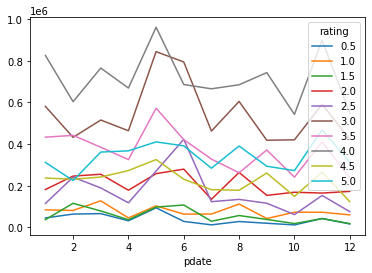

In [16]:
df_pivot.plot()

#### pivot方法相当于对df使用set_index创建分层索引，然后调用unstack

#### 4.stack、unstack、pivot的语法
stack： DataFrame.stack(level=1,dropna=True),将column变成index，类似把横放的书籍变成竖放
level=-1代表多层索引的最内层，可以通过==0、1、2指定多层索引的对应层

.pivot(x_axis,y_axix,value)